In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

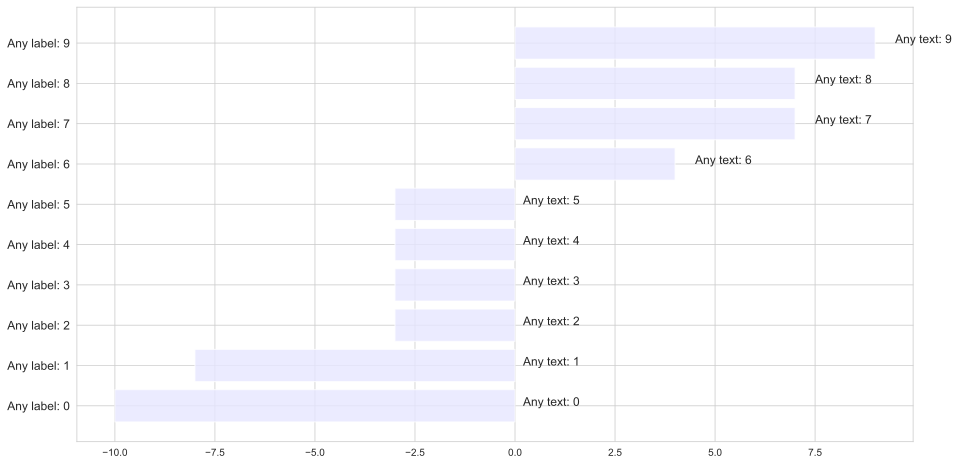

In [64]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['Any label: {}'.format(i) for i in range(10)]
labels = ['Any text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    for i in range (10):
        ax.barh(i, bars_length[i], label=labels[i], color='#e6e6ff', alpha=0.8)
        if bars_length[i]<0:
            ax.annotate(labels[i], xy=(0,i), xytext=(0.2,i), size=12)
        else:
            ax.annotate(labels[i], xy=(0,i), xytext=(bars_length[i]+0.5,i), size=12)
    ax.set_yticks(np.arange(0, 10))
    ax.set_yticklabels(yticks_labels, size=12)
    plt.grid(True)
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

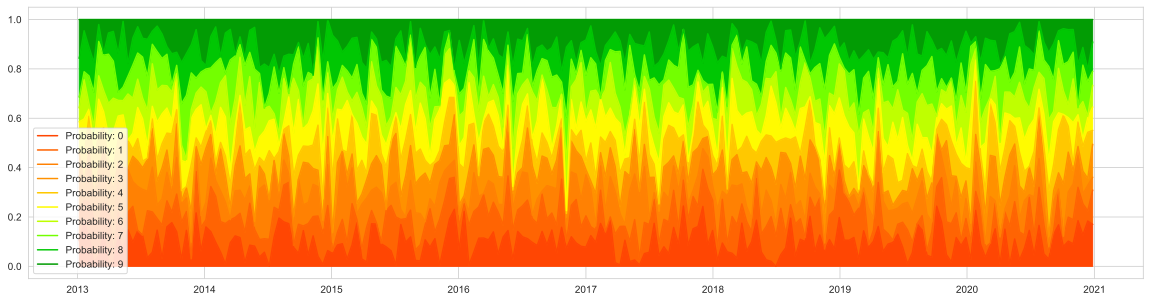

In [65]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
colors = ['green', '#ff6403', '#ff8103','#ff9100', '#ffc800','#fffb00','#bfff00', '#73ff00',  '#00c703','#029c04']


def plot_time_probabilities(pit, fs):
    plt.figure(figsize=fs)
    plt.plot(pit[0], label=f'Probability: {0}', color='#ff4603')
    plt.fill_between(pit.index, pit[0], color='#ff4603') 
    for i in range(1, 10):
        pit[i] += pit[i-1]
        plt.plot(pit[i], label=f'Probability: {i}', color=colors[i])
        plt.fill_between(pit.index, pit[i-1], pit[i], color=colors[i])
    plt.legend(prop={'size': 10}, loc='lower left')
plot_time_probabilities(probabilities_in_time, figsize)

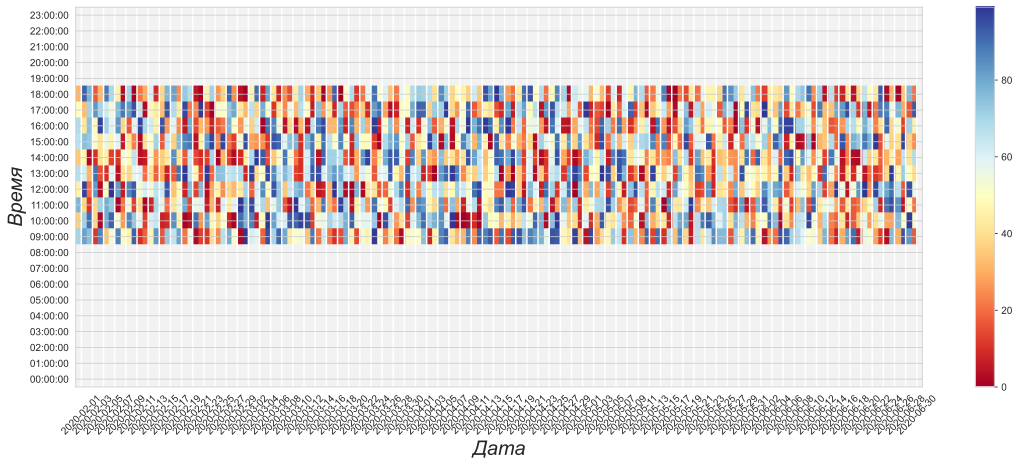

In [66]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (19, 7)

def plot_intraday_ts(intraday_ts, figsize):
    
    fig = plt.figure(figsize = figsize)
    ax = plt.gca()
    
    df = intraday_ts.to_frame()
    df = pd.DataFrame({'Date':intraday_ts.index.date, 'Time': intraday_ts.index.time, 'Temperature': intraday_ts.values})
    df = df.pivot(index = 'Time', columns = 'Date', values = 'Temperature')
    
    plt.imshow(df, aspect = 'auto', cmap = 'RdYlBu', origin ='lower', interpolation= 'nearest' )
    
    ax.set_facecolor('#f2f2f2')
    ax.set_xticks(np.arange(0.5, len(df.columns) + 0.5, 2))
    ax.set_yticks(np.arange(0,len(df.index)))
    ax.set_yticklabels(df.index)
    ax.set_xticklabels(df.columns[::2], rotation = 45,  fontsize = 10)

    ax.grid(axis='x', color = 'white', linewidth = 1.5)
    ax.set_xlabel('Дата', fontsize = 20, fontstyle = 'oblique')
    ax.set_ylabel('Время', fontsize = 20, fontstyle = 'oblique')
    
    plt.colorbar()
    
    
plot_intraday_ts(intraday_ts, figsize)